In [195]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import missingno as msno
import autoreload
import csv
import os
import sys

from collections import defaultdict, Counter

%matplotlib inline
%reload_ext autoreload
%autoreload 2

sb.set()
sb.set_style("darkgrid")
pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 1000)

In [196]:
df = pd.read_csv(r"D:\Open Classroom\Data Files\Telcom Users\telecom_users.csv")
df.rename(columns = {"Unnamed: 0": "CustomerVal"}, inplace = True)
df.head()

,CustomerVal,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


In [197]:
df.shape

(5986, 22)

In [198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerVal       5986 non-null   int64  
 1   customerID        5986 non-null   object 
 2   gender            5986 non-null   object 
 3   SeniorCitizen     5986 non-null   int64  
 4   Partner           5986 non-null   object 
 5   Dependents        5986 non-null   object 
 6   tenure            5986 non-null   int64  
 7   PhoneService      5986 non-null   object 
 8   MultipleLines     5986 non-null   object 
 9   InternetService   5986 non-null   object 
 10  OnlineSecurity    5986 non-null   object 
 11  OnlineBackup      5986 non-null   object 
 12  DeviceProtection  5986 non-null   object 
 13  TechSupport       5986 non-null   object 
 14  StreamingTV       5986 non-null   object 
 15  StreamingMovies   5986 non-null   object 
 16  Contract          5986 non-null   object 


In [199]:
df.columns = [x.lower() for x in df.columns]

In [200]:
genLines = df.groupby("gender")
genLines["multiplelines"].value_counts().rename("tota count").to_frame()

tota count
gender multiplelines               
Female No                      1400
       Yes                     1251
       No phone service         285
Male   No                      1448
       Yes                     1297
       No phone service         305

Text(0.5, 1.0, 'Monthly Charges Categorized by Gender \nBased on Partners')

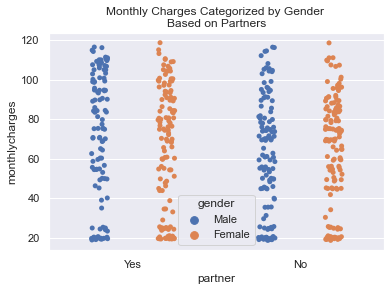

In [201]:
sb.stripplot(x = df["partner"].head(500), y = df["monthlycharges"].head(500), data = df, hue = "gender", dodge = True)
plt.title("Monthly Charges Categorized by Gender \nBased on Partners")

In [202]:
df["dependents"].value_counts()

No     4195
Yes    1791
Name: dependents, dtype: int64

In [203]:
sencitizen = df.groupby("seniorcitizen")
sencitizen["dependents"].value_counts().rename("total").to_frame()

total
seniorcitizen dependents       
0             No           3302
              Yes          1718
1             No            893
              Yes            73

In [204]:
df["contract"].value_counts()

Month-to-month    3269
Two year          1441
One year          1276
Name: contract, dtype: int64

Text(0.5, 1.0, 'Contract Rate for the Male Customers')

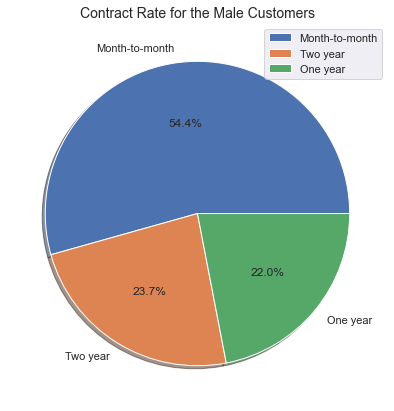

In [205]:
gencontract = df.groupby("gender")
getgender = gencontract.get_group("Male")
getgender = getgender["contract"].value_counts()#.to_frame()
contract = []
awarded = []
for i in getgender.iteritems():#["contract"].value_counts():
    contract.append(i[0])
    awarded.append(i[1])

plt.figure(figsize = (7, 7))
plt.pie(x = awarded, labels = contract, autopct = "%1.1f%%", shadow = True, data = getgender)
sb.set_style("dark")
plt.legend(loc = "best")
plt.title("Contract Rate for the Male Customers", fontsize = (14))

Text(0.5, 1.0, 'Contracts Awarded to the Female Customers')

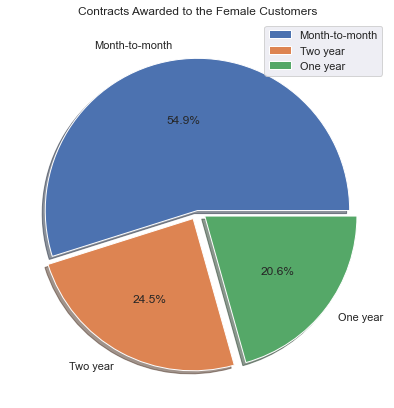

In [206]:
gencontract = df.groupby("gender")
getgender = gencontract.get_group("Female")
getgender = getgender["contract"].value_counts()
contract = []
awarded = []
for i in getgender.iteritems():
    contract.append(i[0])
    awarded.append(i[1])

explode = [0.0, 0.06, 0.06]
plt.figure(figsize = (7, 7), frameon = False, facecolor = "grey", edgecolor = "white")
plt.pie(x = awarded, labels = contract, shadow = True, explode = explode, autopct = "%1.1f%%")
plt.legend(loc = "best")
plt.title("Contracts Awarded to the Female Customers")

In [207]:
df["paymentmethod"].value_counts()

Electronic check             2006
Mailed check                 1369
Bank transfer (automatic)    1308
Credit card (automatic)      1303
Name: paymentmethod, dtype: int64

Text(0.5, 1.0, 'Mode of Payment Achieved Based \nOn Gender')

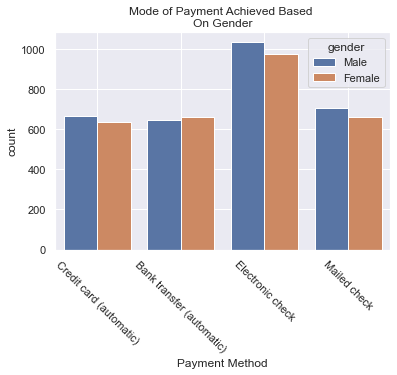

In [269]:
sb.countplot(x = df["paymentmethod"].rename("Payment Method"), data = df, hue = "gender")
plt.xticks(rotation = -45)
plt.grid(which = "both")
#plt.yticks(labels = ["Total Payments"])
plt.title("Mode of Payment Achieved Based \nOn Gender")

In [209]:
moncharges = df.groupby("gender").agg({"monthlycharges": "sum"}).rename(columns = {"monthlycharges": "Monthly Charge"})
moncharges

,Monthly Charge
gender,
Female,191546.60
Male,196359.45


In [210]:
df["totalcharges"].dropna(axis = "index", how = "any", inplace = True)

In [211]:
df["totalcharges"].value_counts()

           10
20.2       10
19.75       8
19.55       7
20.05       6
           ..
2106.05     1
1250.1      1
4859.95     1
7982.5      1
5293.2      1
Name: totalcharges, Length: 5611, dtype: int64

In [212]:
df["paperlessbilling"].value_counts()

Yes    3528
No     2458
Name: paperlessbilling, dtype: int64

In [213]:
df.groupby("paperlessbilling").agg({"totalcharges": "sum"}).rename(columns = {"totalcharges": "Total charge"})

,Total charge
paperlessbilling,
No,1734.65119.51309.151561.52614.1667.71334.51463...
Yes,3973.22869.85238.53370.22989.624.96382.553482....


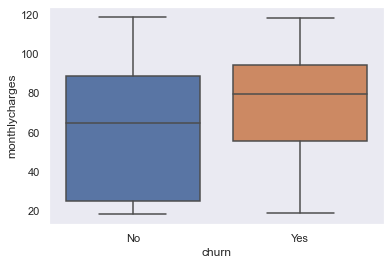

In [214]:
sb.boxplot(x = "churn", y = "monthlycharges", data = df)

In [215]:
genchurn = df.groupby("gender")
genchurn["churn"].value_counts().rename("disturbed").to_frame()

disturbed
gender churn           
Female No          2145
       Yes          791
Male   No          2254
       Yes          796

In [216]:
df["internetservice"].value_counts()

Fiber optic    2627
DSL            2068
No             1291
Name: internetservice, dtype: int64

In [217]:
round(df["deviceprotection"].value_counts(normalize = True)*100, 2)

No                     44.10
Yes                    34.33
No internet service    21.57
Name: deviceprotection, dtype: float64

In [218]:
intdevice = df.groupby("internetservice")
intdevice["deviceprotection"].value_counts()

internetservice  deviceprotection   
DSL              No                     1158
                 Yes                     910
Fiber optic      No                     1482
                 Yes                    1145
No               No internet service    1291
Name: deviceprotection, dtype: int64

Text(0.5, 1.0, 'How many months a person has been a client to the company')

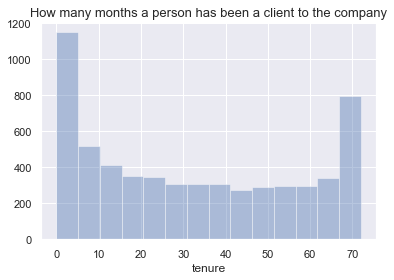

In [234]:
tenure = df["tenure"]
sb.distplot(a = tenure, hist = True, kde = False)
plt.grid()
plt.title("How many months a person has been a client to the company", fontsize = (13))

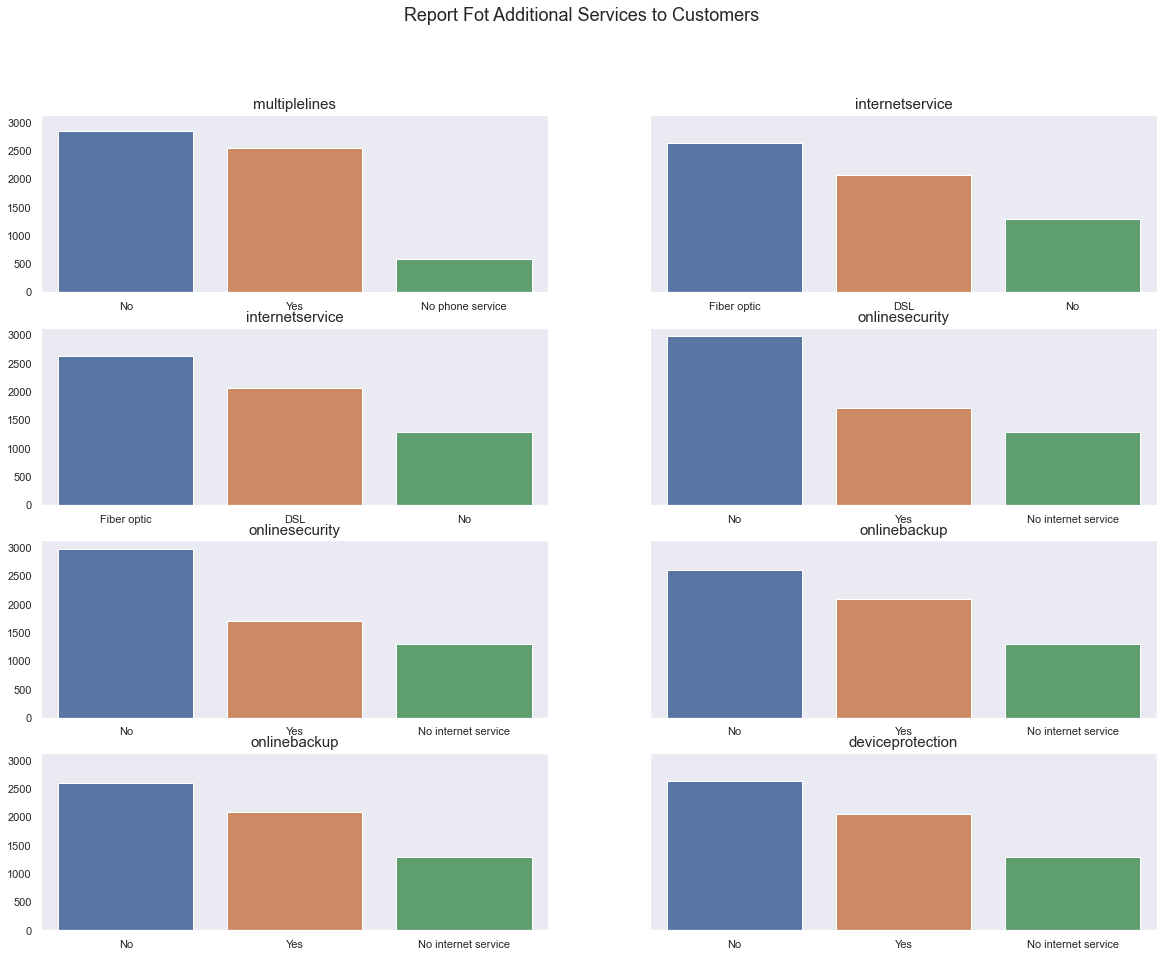

In [266]:
other_services = ["multiplelines", "internetservice", "onlinesecurity", "onlinebackup", "deviceprotection", "techsupport", "streamingtv", "streamingmovies"]

fig, ax = plt.subplots(nrows = 4, ncols = 2, figsize = (20, 15), sharey = True)
t = 0

for i in range(4):
    for j in range(2):
        df_source = [df[obj].value_counts() for obj in other_services]
        axes = ax[i][j]
        
        sb.barplot(x = df_source[t].index, y = df_source[t].values, data = df, ax = axes)
        axes.set_title(other_services[t], fontsize = (15))
        
        if j == 0:
            axes.set_label("Number of Clients")
            t += 1

fig.suptitle("Report Fot Additional Services to Customers", fontsize = (18))
plt.show()
        

In [299]:
df_cols = list(df.dtypes[df.dtypes == object].index)

for i in df_cols:
    df[i] = df[i].astype("category")
    
cat_cols = df.select_dtypes(["category"]).columns
df[cat_cols] = df[cat_cols].apply(lambda x: x.cat_cols)
round(df.abs(), 2)

,customerval,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,1869.0,1.0,1.0,0.0,1.0,1.0,72.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,24.10,1.0,1.0
1,4528.0,1.0,1.0,0.0,1.0,1.0,44.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,88.15,1.0,1.0
2,6344.0,1.0,1.0,1.0,1.0,1.0,38.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,74.95,1.0,1.0
3,6739.0,1.0,1.0,0.0,1.0,1.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,55.90,1.0,1.0
4,432.0,1.0,1.0,0.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,53.45,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5981,3772.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,95.00,1.0,1.0
5982,5191.0,1.0,1.0,0.0,1.0,1.0,23.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,91.10,1.0,1.0
5983,5226.0,1.0,1.0,0.0,1.0,1.0,12.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,21.15,1.0,1.0
5984,5390.0,1.0,1.0,1.0,1.0,1.0,12.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,99.45,1.0,1.0


In [300]:
df["gender"].value_counts()

-1    5986
Name: gender, dtype: int64

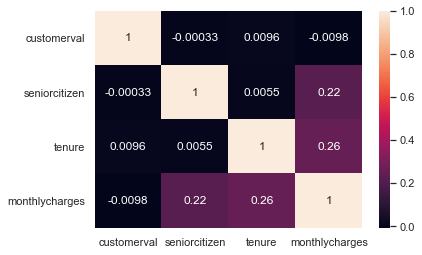

In [275]:
sb.heatmap(data = df.corr(), annot = True)

In [289]:
object_cols = list(df.dtypes[df.dtypes == object].index)

for i in object_cols:
    df[i] = df[i].astype('category')
    
cat_columns = df.select_dtypes(['category']).columns
df[cat_columns] = df[cat_columns].apply(lambda x: x.cat.codes)
df

,customerval,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,1869,-1,-1,0,-1,-1,72,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,24.10,-1,-1
1,4528,-1,-1,0,-1,-1,44,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,88.15,-1,-1
2,6344,-1,-1,1,-1,-1,38,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,74.95,-1,-1
3,6739,-1,-1,0,-1,-1,4,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,55.90,-1,-1
4,432,-1,-1,0,-1,-1,2,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,53.45,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5981,3772,-1,-1,0,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,95.00,-1,-1
5982,5191,-1,-1,0,-1,-1,23,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,91.10,-1,-1
5983,5226,-1,-1,0,-1,-1,12,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,21.15,-1,-1
5984,5390,-1,-1,1,-1,-1,12,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,99.45,-1,-1
